In [86]:
import spei as si
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy as np

In [87]:
# Baca file CSV menjadi DataFrame
df = pd.read_csv('output/apt-pranoto-pet.csv')
df = df.drop('Unnamed: 0', axis=1)

# Hapus baris yang memiliki nilai NaN pada kolom 'RR'
df.dropna(subset=['RR'], inplace=True)

# Ganti nilai 8888.0 dan 9999.0 pada kolom 'RR' dengan nilai 0
# df['RR'] = df['RR'].replace([8888.0, 9999.0], 0)
df = df[(df['RR'] != 9999.0) & (df['RR'] != 8888.0)]

# Set kolom 'Tanggal' sebagai indeks DataFrame
df.set_index('Tanggal', inplace=True)

print(len(df))
df.tail()

7044


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Evaporasi
Tanggal,,,,,,,,,,,
2023-06-10,23.4,32.0,25.7,94.0,5.6,2.2,3.0,200.0,1.0,C,0.003978
2023-06-11,22.4,32.0,27.0,89.0,23.2,3.3,3.0,360.0,1.0,C,0.004329
2023-06-12,23.6,29.8,26.1,94.0,5.3,9.2,3.0,240.0,1.0,C,0.003409
2023-06-14,23.2,31.6,26.1,92.0,3.4,2.0,5.0,230.0,1.0,C,0.003968
2023-06-15,23.4,28.2,26.6,91.0,24.5,2.1,3.0,230.0,2.0,W,0.003034


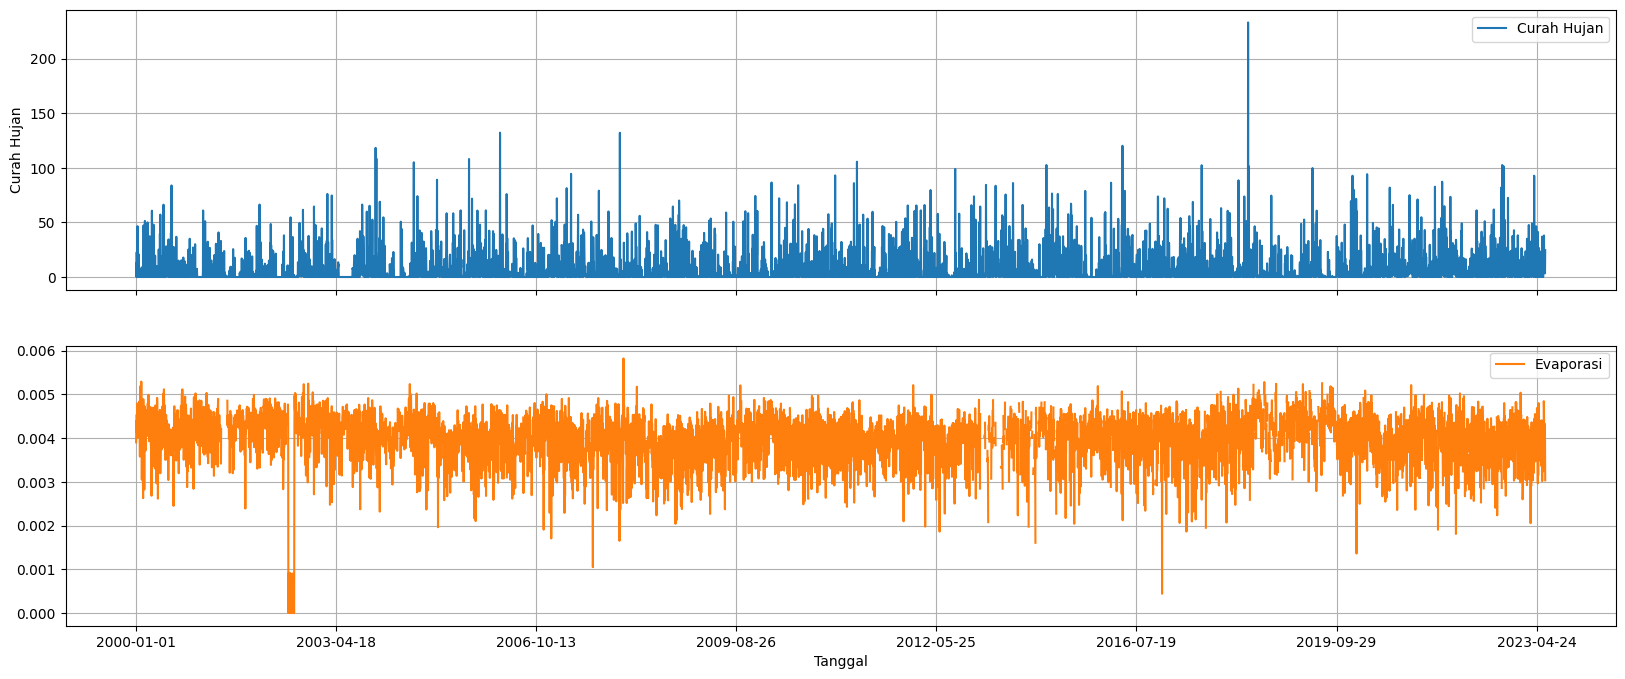

In [88]:
df.rename(columns={'RR': 'Curah Hujan'}, inplace=True)

prec = df['Curah Hujan']
evap = df['Evaporasi']

fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)
prec.plot(ax=ax[0], legend=True, grid=True)
ax[0].set_ylabel('Curah Hujan')

evap.plot(ax=ax[1], color="C1", legend=True, grid=True)

plt.show()

### **Calculate SPEI**

The standardized precipitation evaporation index (SPEI) dihitung dengan mengurangkan data penguapan dari data curah hujan. Secara default, distribusi fisk digunakan untuk menghitung SPEI, namun ada juga distribusi lain yang umum digunakan seperti lognorm, pearson3, dan genextreme. Hasil dari pengurangan ini kemudian dijumlahkan dalam interval bergulir selama 30 hari.

For the literature we refer to: Vicente-Serrano S.M., Beguería S., López-Moreno J.I.: [A Multi-scalar drought index sensitive to global warming: The Standardized Precipitation Evapotranspiration Index](https://doi.org/10.1175/2009JCLI2909.1), 2010.

In [89]:
# 30, 90, 180
f1 = 30
pe1 = (df['Curah Hujan'] - df['Evaporasi']).dropna()  # calculate precipitation excess
spei1 = si.spei(pe1.rolling(f1, min_periods=f1).sum().dropna())

df['SPEI-1'] = spei1
df['Kategori-1'] = pd.cut(df['SPEI-1'], bins=[-np.inf, -2, -1.5, -1, -0.5, np.inf], labels=['EXTREME', 'SEVERE', 'MODERATE', 'MILD', 'NO-DROUGHT'])

# ==========

f3 = 90
pe3 = (df['Curah Hujan'] - df['Evaporasi']).dropna()  # calculate precipitation excess
spei3 = si.spei(pe3.rolling(f3, min_periods=f3).sum().dropna())

df['SPEI-3'] = spei3
df['Kategori-3'] = pd.cut(df['SPEI-3'], bins=[-np.inf, -2, -1.5, -1, -0.5, np.inf], labels=['EXTREME', 'SEVERE', 'MODERATE', 'MILD', 'NO-DROUGHT'])

# ===========

f6 = 180
pe6 = (df['Curah Hujan'] - df['Evaporasi']).dropna()  # calculate precipitation excess
spei6 = si.spei(pe6.rolling(f6, min_periods=f6).sum().dropna())

df['SPEI-6'] = spei6
df['Kategori-6'] = pd.cut(df['SPEI-6'], bins=[-np.inf, -2, -1.5, -1, -0.5, np.inf], labels=['EXTREME', 'SEVERE', 'MODERATE', 'MILD', 'NO-DROUGHT'])

# ============

df.tail()

,Tn,Tx,Tavg,RH_avg,Curah Hujan,ss,ff_x,ddd_x,ff_avg,ddd_car,Evaporasi,SPEI-1,Kategori-1,SPEI-3,Kategori-3,SPEI-6,Kategori-6
Tanggal,,,,,,,,,,,,,,,,,
2023-06-10,23.4,32.0,25.7,94.0,5.6,2.2,3.0,200.0,1.0,C,0.003978,0.188104,NO-DROUGHT,0.623395,NO-DROUGHT,0.362198,NO-DROUGHT
2023-06-11,22.4,32.0,27.0,89.0,23.2,3.3,3.0,360.0,1.0,C,0.004329,0.397850,NO-DROUGHT,0.743832,NO-DROUGHT,0.421266,NO-DROUGHT
2023-06-12,23.6,29.8,26.1,94.0,5.3,9.2,3.0,240.0,1.0,C,0.003409,0.444190,NO-DROUGHT,0.762804,NO-DROUGHT,0.425717,NO-DROUGHT
2023-06-14,23.2,31.6,26.1,92.0,3.4,2.0,5.0,230.0,1.0,C,0.003968,0.237907,NO-DROUGHT,0.764340,NO-DROUGHT,0.437342,NO-DROUGHT
2023-06-15,23.4,28.2,26.6,91.0,24.5,2.1,3.0,230.0,2.0,W,0.003034,0.452008,NO-DROUGHT,0.710351,NO-DROUGHT,0.272279,NO-DROUGHT


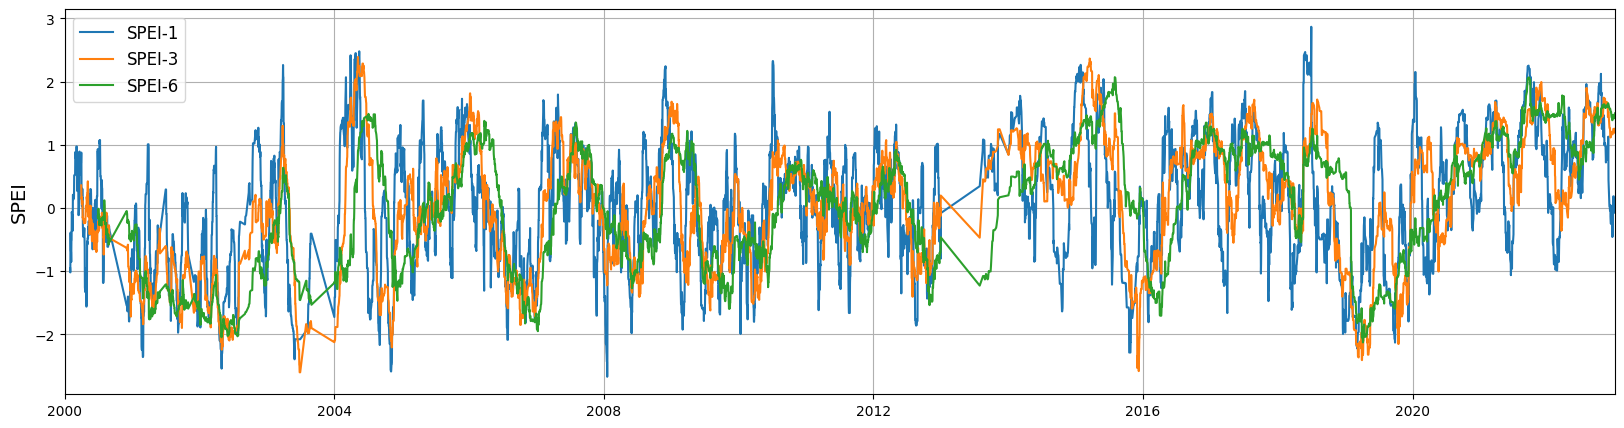

In [90]:
# Plot grafik SPEI-1, SPEI-3, dan SPEI-6
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(spei1.index, spei1.values, label='SPEI-1')
ax.plot(spei3.index, spei3.values, label='SPEI-3')
ax.plot(spei6.index, spei6.values, label='SPEI-6')
ax.set_xlim(pd.to_datetime(["2000", "2023"]))
ax.grid()
ax.set_ylabel("SPEI", fontsize=14)
ax.legend(fontsize=12)

plt.show()

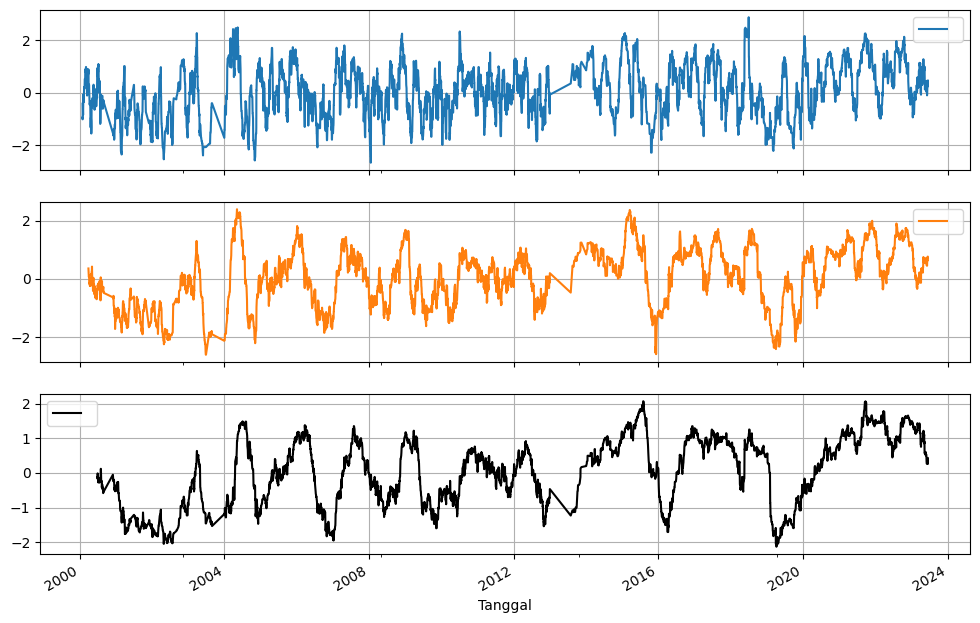

In [91]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
spei1.plot(ax=ax[0], legend=True, grid=True)
spei3.plot(ax=ax[1], color="C1", legend=True, grid=True)
spei6.plot(ax=ax[2], color="k", legend=True, grid=True);

Text(0, 0.5, 'SPEI-1')

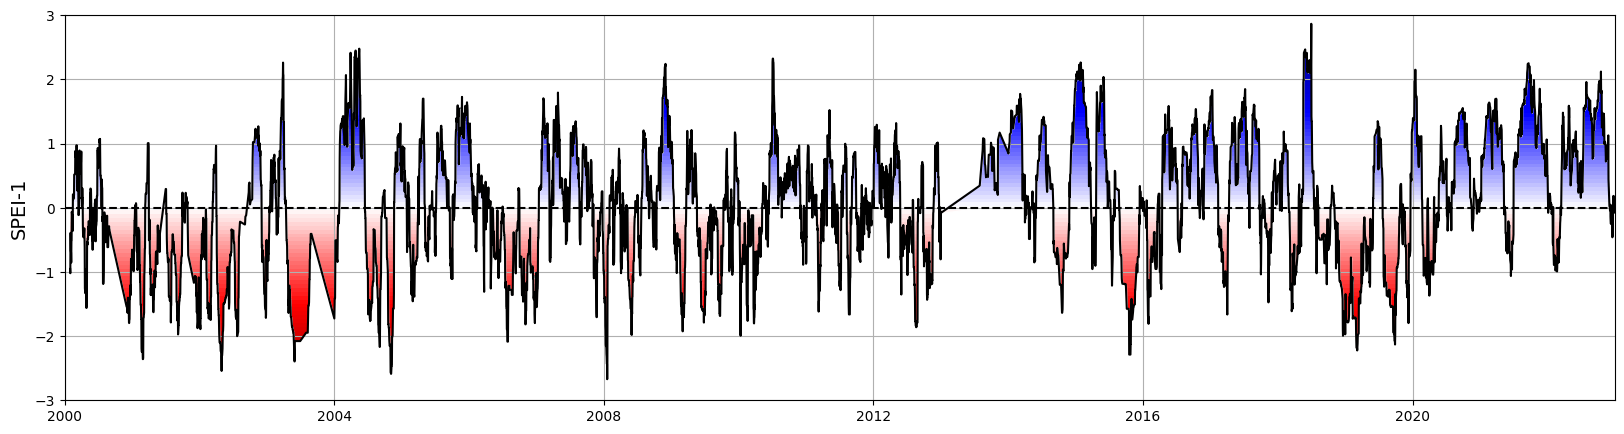

In [92]:
f1, ax = plt.subplots(figsize=(20, 5))
si.plot.si(spei1, ax=ax)
ax.set_xlim(pd.to_datetime(["2000", "2023"]))
ax.grid()
ax.set_ylabel("SPEI-1", fontsize=14)

Text(0, 0.5, 'SPEI-3')

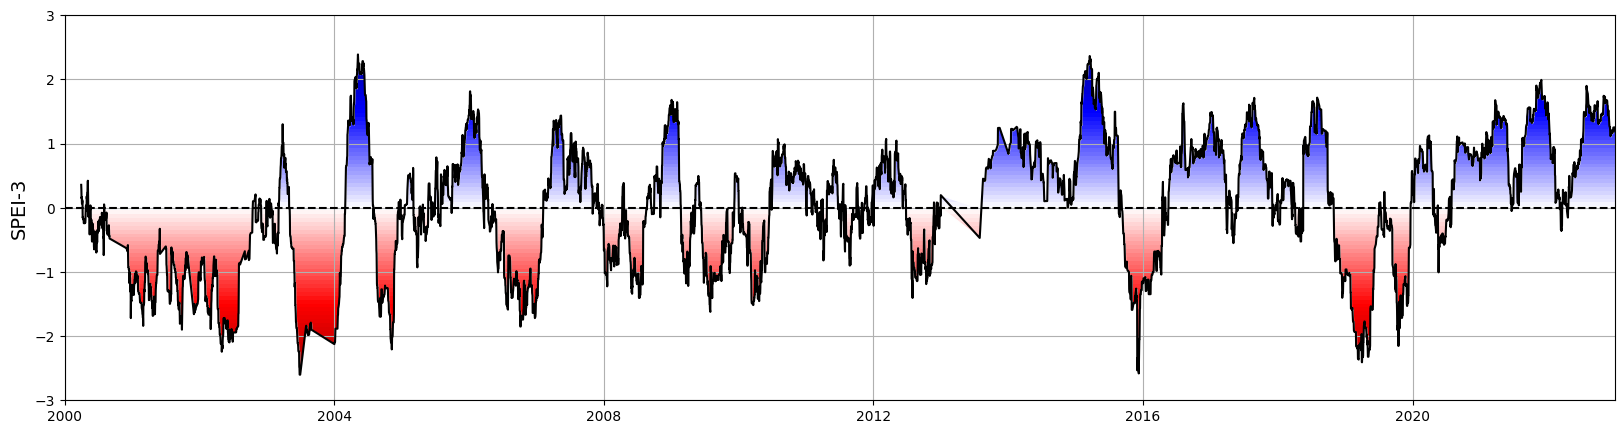

In [93]:
f3, ax = plt.subplots(figsize=(20, 5))
si.plot.si(spei3, ax=ax)
ax.set_xlim(pd.to_datetime(["2000", "2023"]))
ax.grid()
ax.set_ylabel("SPEI-3", fontsize=14)

Text(0, 0.5, 'SPEI-6')

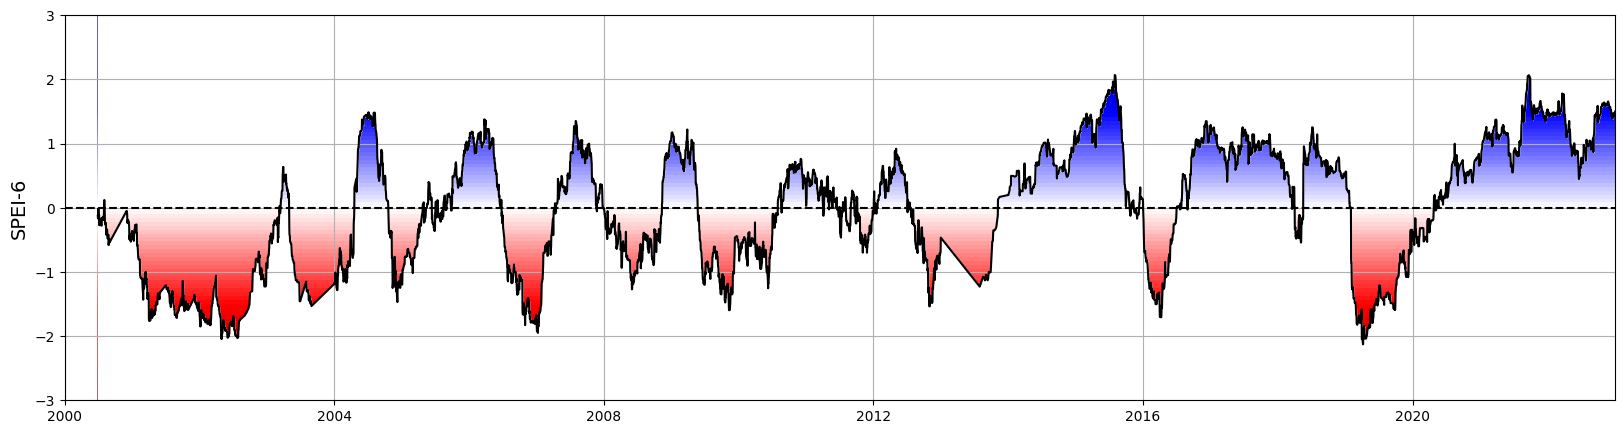

In [94]:
f6, ax = plt.subplots(figsize=(20, 5))
si.plot.si(spei6, ax=ax)
ax.set_xlim(pd.to_datetime(["2000", "2023"]))
ax.grid()
ax.set_ylabel("SPEI-6", fontsize=14)

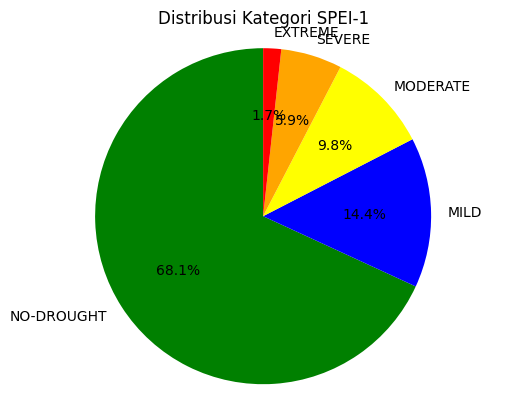

In [95]:
import matplotlib.pyplot as plt

kategori_counts = df['Kategori-1'].value_counts()

labels = kategori_counts.index
sizes = kategori_counts.values

colors = ['green', 'blue', 'yellow', 'orange', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Kategori SPEI-1')
plt.axis('equal')

plt.show()

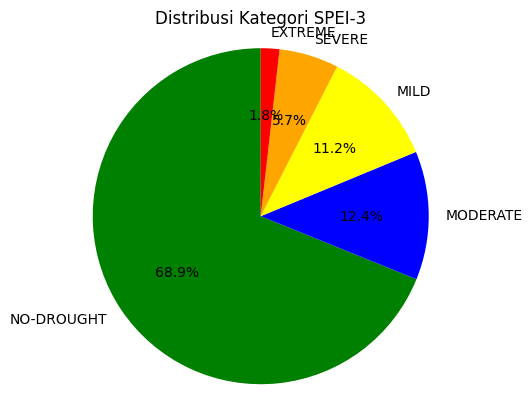

In [96]:
import matplotlib.pyplot as plt

kategori_counts = df['Kategori-3'].value_counts()

labels = kategori_counts.index
sizes = kategori_counts.values

colors = ['green', 'blue', 'yellow', 'orange', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Kategori SPEI-3')
plt.axis('equal')

plt.show()

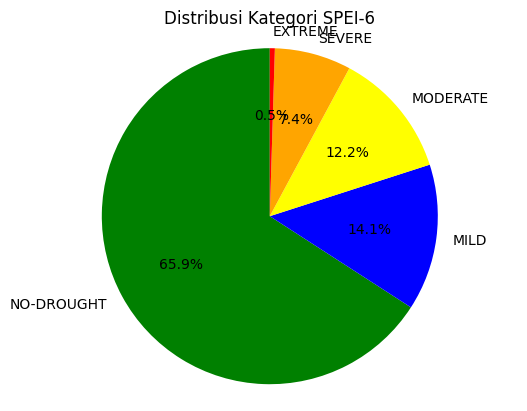

In [97]:
import matplotlib.pyplot as plt

kategori_counts = df['Kategori-6'].value_counts()

labels = kategori_counts.index
sizes = kategori_counts.values

colors = ['green', 'blue', 'yellow', 'orange', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Kategori SPEI-6')
plt.axis('equal')

plt.show()

In [98]:
# Exporting to CSV
df.to_csv('output/apt-pranoto-spei.csv')